## Visualize filter extremes rule
Small scripting to visualize the result of the filter extremes rule. In this exammple the peaks and troughs of the water level were calculated and used to find the values of the salinity at that moment.

The input_file.yaml that was used for this visualization: 

version: 0.3.14

input-data:
  - dataset:
      filename: tests_acceptance/input_nc_files/delft3dfmflow_output_example_DWSM-FM_200m_0004_map.nc
      variable_mapping:
        mesh2d_sa1: "salinity"
        mesh2d_s1: "water_level"

rules:
  - filter_extremes_rule:
      name: Test filter extremes rule
      description: Testing..
      input_variable: water_level
      output_variable: water_level_peaks_mask
      extreme_type: peaks
      distance: 11
      time_scale: hour
      mask: True

  - filter_extremes_rule:
      name: Test filter extremes rule
      description: Testing..
      input_variable: water_level
      output_variable: water_level_peaks
      extreme_type: peaks
      distance: 11
      time_scale: hour
      mask: False

  - filter_extremes_rule:
      name: Test filter extremes rule
      description: Testing..
      input_variable: water_level
      output_variable: water_level_troughs
      extreme_type: troughs
      distance: 11
      time_scale: hour
      mask: False

  - filter_extremes_rule:
      name: Test filter extremes rule
      description: Testing..
      input_variable: water_level
      output_variable: water_level_troughs_mask
      extreme_type: troughs
      distance: 11
      time_scale: hour
      mask: True

  - layer_filter_rule:
      name: Get 8th layer of salinity
      description: get 8th layer of model
      layer_number: 8
      input_variable: salinity
      output_variable: salinity_8

  - combine_results_rule:
      name: test combining
      operation: multiply
      input_variables: ["water_level_peaks_mask", "salinity_8"]
      output_variable: salinity_peaks

  - combine_results_rule:
      name: test combining
      operation: multiply
      input_variables: ["water_level_troughs_mask", "salinity_8"]
      output_variable: salinity_troughs

output-data:
  filename: test_ecotope_calculation.nc


In [1]:
import matplotlib
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [61]:
ds = xr.open_dataset("../data/test_ecotope_calculation.nc")

In [66]:
face = 10
sal = ds.salinity_8.isel(mesh2d_nFaces=face)
wl = ds.water_level.isel(mesh2d_nFaces=face)
sal_peaks = ds.salinity_peaks.isel(mesh2d_nFaces=face)
sal_troughs = ds.salinity_troughs.isel(mesh2d_nFaces=face)
wl_peaks = ds.water_level_peaks.isel(mesh2d_nFaces=face)
wl_troughs = ds.water_level_troughs.isel(mesh2d_nFaces=face)

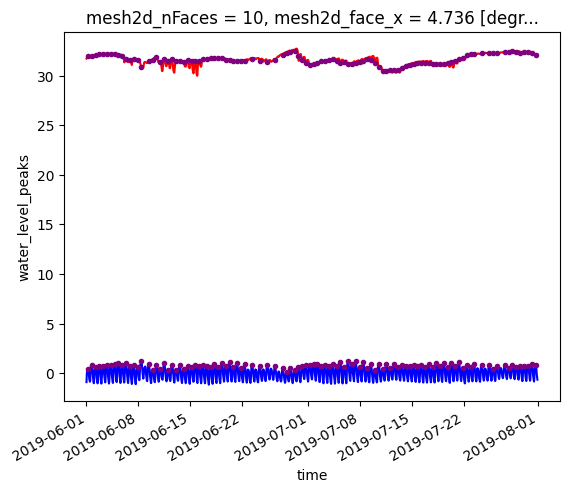

In [67]:
plt.figure()
sal.plot(color="red")
wl.plot(color="blue")
sal_peaks.plot.line(color="purple", marker=".")
wl_peaks.plot.line(color="purple", marker=".")
plt.show()

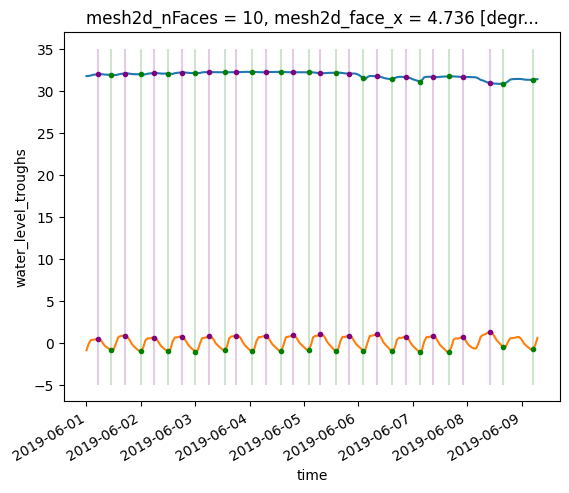

In [68]:
plt.figure()
size = 200
sal[:size].plot()
wl[:size].plot()
sal_peaks[:size].plot.line(color="purple", marker=".")
wl_peaks[:size].plot.line(color="purple", marker=".")
sal_troughs[:size].plot.line(color="green", marker=".")
wl_troughs[:size].plot.line(color="green", marker=".")
plt.vlines(sal_peaks[:size].dropna(dim="time").time, -5, 35, color="purple", alpha=0.2)
plt.vlines(sal_troughs[:size].dropna(dim="time").time, -5, 35, color="green", alpha=0.2)
plt.show()

